In [4]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [5]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

In [35]:
# let's create a new dataframe for these three countries 
# df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]['Total'].reset_index()
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]['Total']
df_dsn.to_dict()

{'Denmark': 3901, 'Norway': 2327, 'Sweden': 5866}

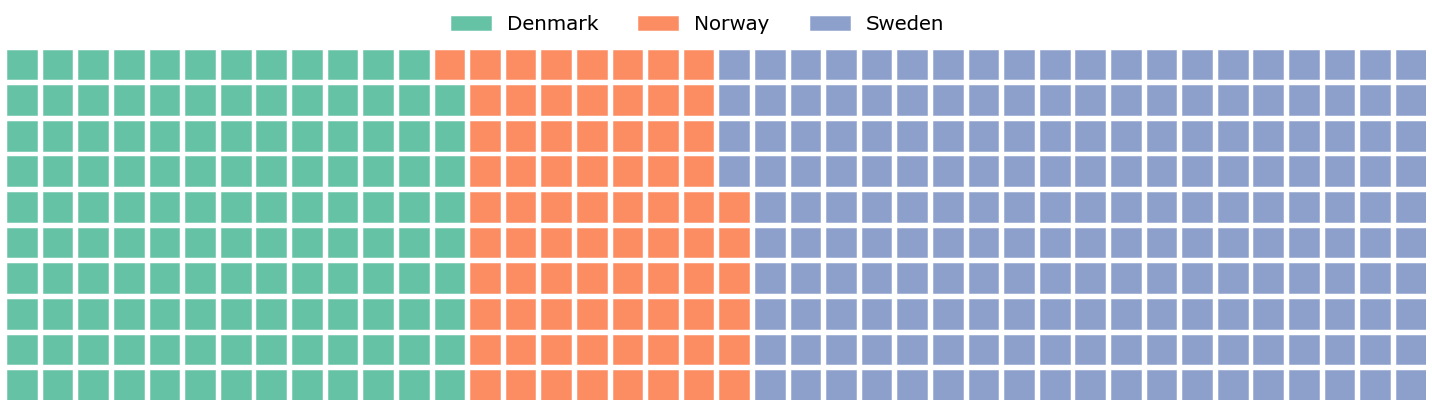

In [63]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40, 
    values=df_dsn.to_dict(),
    legend={'loc': 'upper left', 'bbox_to_anchor': (0.3, 1.15), 'ncol': len(df_dsn.to_dict()),'framealpha': 0,'fontsize': 20},
    figsize=(20, 8)  # figsize is a parameter of matplotlib.pyplot.figure
)
plt.show()